# Data Munging and Exploratory Data Analysis


In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell


## Setup and Configuration


In [2]:
### Set up project root and import custom modules
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

## Configure plotting and display options
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = [12, 8]
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'


## Data Loading


In [3]:
def load_data(file_path):
    """Load JSON data from file and return as DataFrame."""
    with open(file_path, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data["products"][0].items(), columns=["id", "raw_data"])
    df["raw_length"] = df["raw_data"].apply(lambda x: len(x.split()))
    return df

products_df = load_data("../data/final_products_data.json")

print("Initial DataFrame Info:")
products_df.info()

print("\nFirst two rows of the DataFrame:")
display(products_df.head(2))


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127 entries, 0 to 4126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4127 non-null   object
 1   raw_data    4127 non-null   object
 2   raw_length  4127 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 96.9+ KB

First two rows of the DataFrame:


id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              


## Data Cleaning and Preprocessing


In [4]:
def remove_duplicates(df):
    """Remove duplicates based on 'raw_data' while keeping the first occurrence."""
    raw_data_to_ids = df.groupby("raw_data")["id"].apply(list).to_dict()
    df["duplicate_ids"] = df["raw_data"].map(raw_data_to_ids)
    unique_df = df.drop_duplicates(subset="raw_data", keep="first").reset_index(drop=True)
    return unique_df

products_df = remove_duplicates(products_df)

print("Rows where duplicate_ids contains more than one ID:")
display(products_df[products_df["duplicate_ids"].apply(len) > 1][["id", "duplicate_ids", "raw_length"]].head(10))

print(f"\nTotal number of unique raw_data entries: {len(products_df)}")
print(f"Number of entries with multiple IDs: {sum(products_df['duplicate_ids'].apply(len) > 1)}")

print("\nUpdated DataFrame Info:")
products_df.info()

print("\nFirst few rows of the updated DataFrame:")
display(products_df[["id", "duplicate_ids", "raw_data"]].head(2))


Rows where duplicate_ids contains more than one ID:


,id,duplicate_ids,raw_length
9,20-101-0356,"[20-101-0356, 20-101-0357, 20-101-0358]",12790
10,20-101-0455,"[20-101-0455, 20-101-0430, 20-101-0456]",10266
14,20-101-0575,"[20-101-0575, 20-101-0599, 20-101-0600, 20-101-0602]",1271
15,20-101-1220,"[20-101-1220, 101-1268, 101-1270, 20-101-1256, 20-101-1258, 20-101-1259, 20-101-1260]",547
16,34006-1000-15-1,"[34006-1000-15-1, 34006-1020-15-1, 34006-1040-17-2, 34006-2000-13-2, 34006-2000-15-2, 34006-2000-17-2, 34006-2000-19-4, 34006-2080-13-2, 34006-4016-19-4, 34007-1000-15-1, 34007-1020-15-1, 34007-2000-18-4, 34007-4000-20-4]",600
17,34012-0416-N1-2,"[34012-0416-N1-2, 34012-0432-J2-4, 34013-0416-R1-2, 34013-0432-R1-4, 34013-0832-R2-4]",965
18,34014-1600-12-3,"[34014-1600-12-3, 34014-1600-14-5, 34014-1600-17-7, 34014-3200-14-5, 34014-3200-17-7, 34014-8000-11-1, 34015-1600-12-3, 34015-1600-14-5, 34015-1600-17-7, 34015-3200-14-5, 34015-3200-17-7, 34015-8000-12-3]",774
20,34105-0000-00-0,"[34105-0000-00-0, 34105-0000-00-1]",3769
21,36021-0000-20-1,"[36021-0000-20-1, 36021-0000-23-3, 36021-0000-24-5, 36021-0000-26-7, 36021-4000-24-5, 36021-8000-26-7, 36021-8000-26-7EXT, 36021-8032-26-7, 36021-8032-26-7EXT]",649
23,36022-0000-22-2,"[36022-0000-22-2, 36022-0000-24-3, 36022-0000-26-5, 36022-0000-28-7, 36022-4000-26-5, 36022-8000-28-7, 36022-8000-28-7EXT, 36022-8032-28-7, 36022-8032-28-7EXT]",660



Total number of unique raw_data entries: 1599
Number of entries with multiple IDs: 784

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1599 non-null   object
 1   raw_data       1599 non-null   object
 2   raw_length     1599 non-null   int64 
 3   duplicate_ids  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.1+ KB

First few rows of the updated DataFrame:


id duplicate_ids                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Data Exploration and Visualization


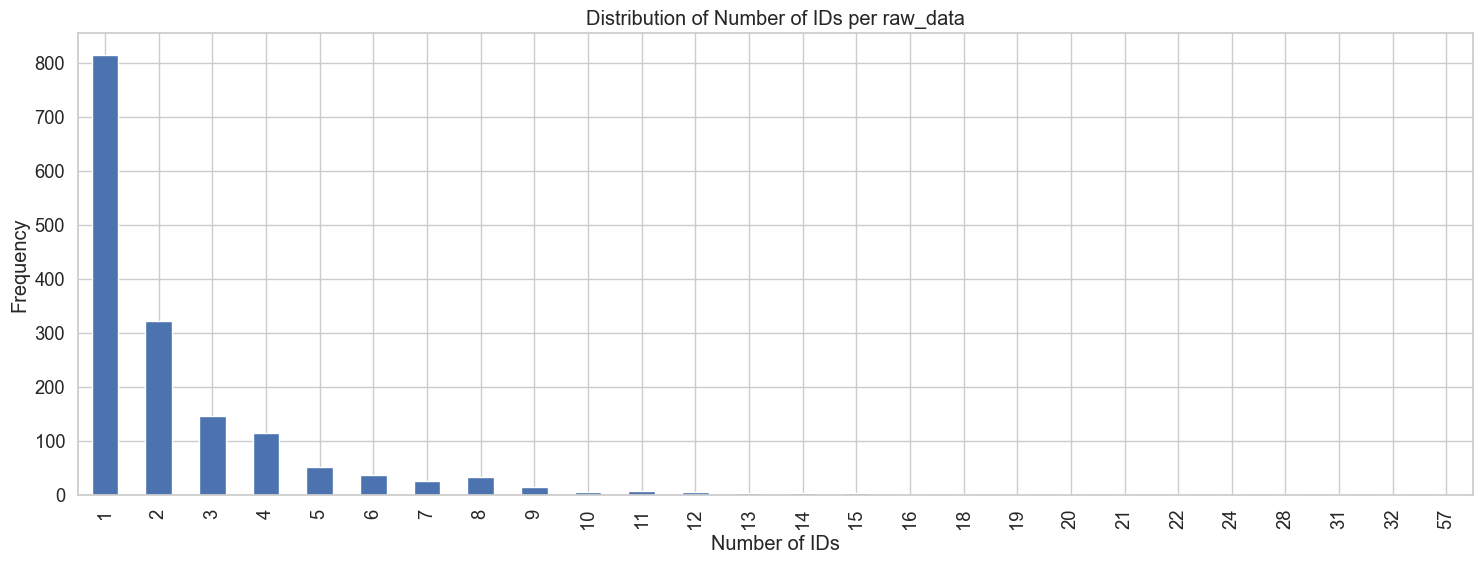

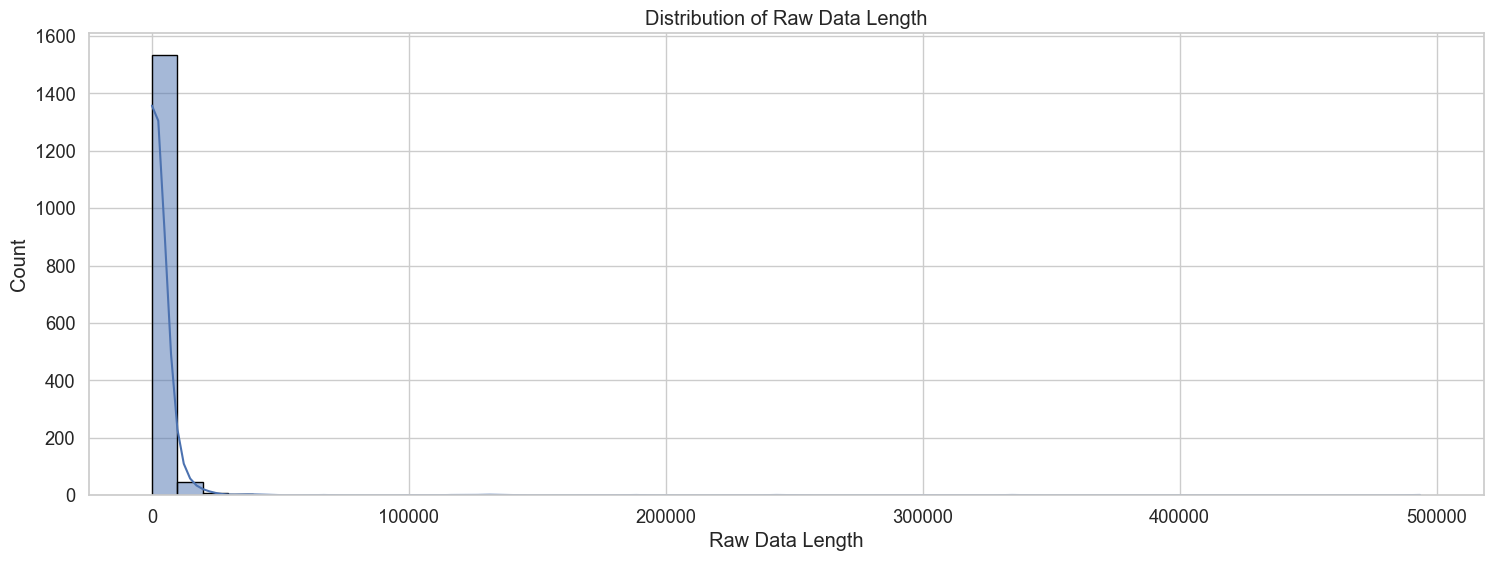

In [5]:
def plot_id_distribution(df):
    """Plot distribution of number of IDs per raw_data."""
    id_counts = df["duplicate_ids"].apply(len).value_counts().sort_index()
    plt.figure(figsize=(18, 6))
    id_counts.plot(kind="bar")
    plt.title("Distribution of Number of IDs per raw_data")
    plt.xlabel("Number of IDs")
    plt.ylabel("Frequency")
    plt.show()

def plot_raw_length_distribution(df):
    """Plot distribution of raw data length."""
    plt.figure(figsize=(18, 6))
    plt.title("Distribution of Raw Data Length")
    sns.histplot(df["raw_length"], bins=50, kde=True, edgecolor="black")
    plt.xlabel("Raw Data Length")
    plt.ylabel("Count")
    plt.show()

plot_id_distribution(products_df)
plot_raw_length_distribution(products_df)



## Data Cleaning: Remove short raw_data entries


In [8]:
min_raw_length = 50
print(f"Products with raw_length less than {min_raw_length}:")
# display(products_df[products_df["raw_length"] < min_raw_length])

products_df = products_df[products_df["raw_length"] >= min_raw_length]
print(f"\nNumber of products after removing short entries: {len(products_df)}")


Products with raw_length less than 50:

Number of products after removing short entries: 1563



## Additional Exploration


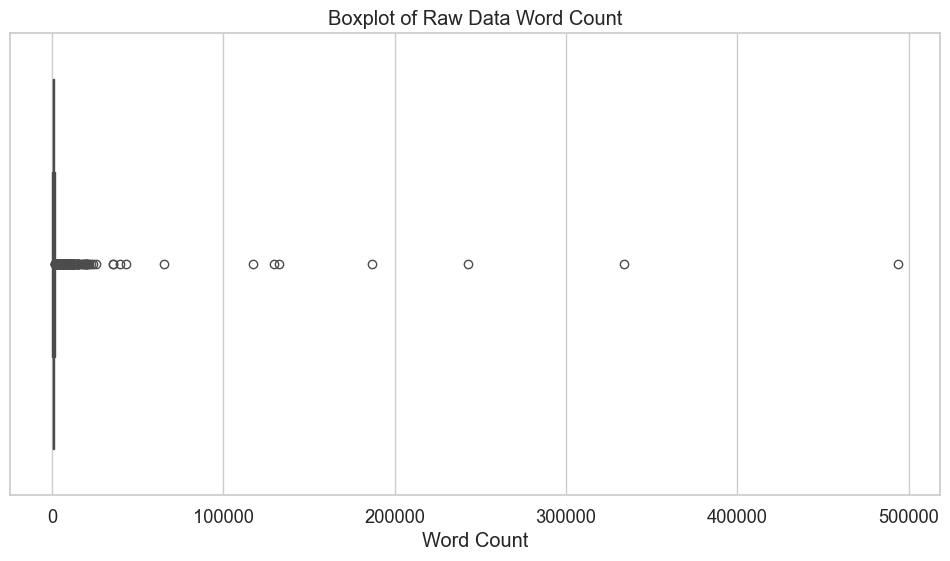

Summary statistics of raw_length:


count     1563.00
mean      2887.25
std      18125.69
min         74.00
25%        511.50
50%        697.00
75%       1066.00
max     493591.00
Name: raw_length, dtype: float64

In [9]:
def plot_word_count_boxplot(df):
    """Plot boxplot of word counts."""
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["raw_length"])
    plt.title("Boxplot of Raw Data Word Count")
    plt.xlabel("Word Count")
    plt.show()

plot_word_count_boxplot(products_df)

print("Summary statistics of raw_length:")
display(products_df["raw_length"].describe())


In [11]:
# Data Preparation for Further Processing
def prepare_data_for_processing(df, num_bins=10):
    """Prepare data for further processing by sorting and shuffling within bins."""
    df = df.sort_values('raw_length')
    df['length_bin'] = pd.qcut(df['raw_length'], q=num_bins, labels=False)
    df = df.groupby('length_bin').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)
    df = df.drop('length_bin', axis=1)
    return df.reset_index(drop=True)

products_df = prepare_data_for_processing(products_df)

print("Final DataFrame Info:")
products_df.info()

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1563 non-null   object
 1   raw_data       1563 non-null   object
 2   raw_length     1563 non-null   int64 
 3   duplicate_ids  1563 non-null   object
dtypes: int64(1), object(3)
memory usage: 49.0+ KB


/var/folders/rp/6b0gnlkd7cl_wvl_lj9y8nx40000gn/T/ipykernel_14245/2958842606.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('length_bin').apply(lambda x: x.sample(frac=1)).reset_index(drop=True)


## Save processed data


In [12]:
output_path = "../data/processed_products_df.csv"
products_df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")


Processed data saved to: ../data/processed_products_df.csv



## Additional Visualizations and Analysis


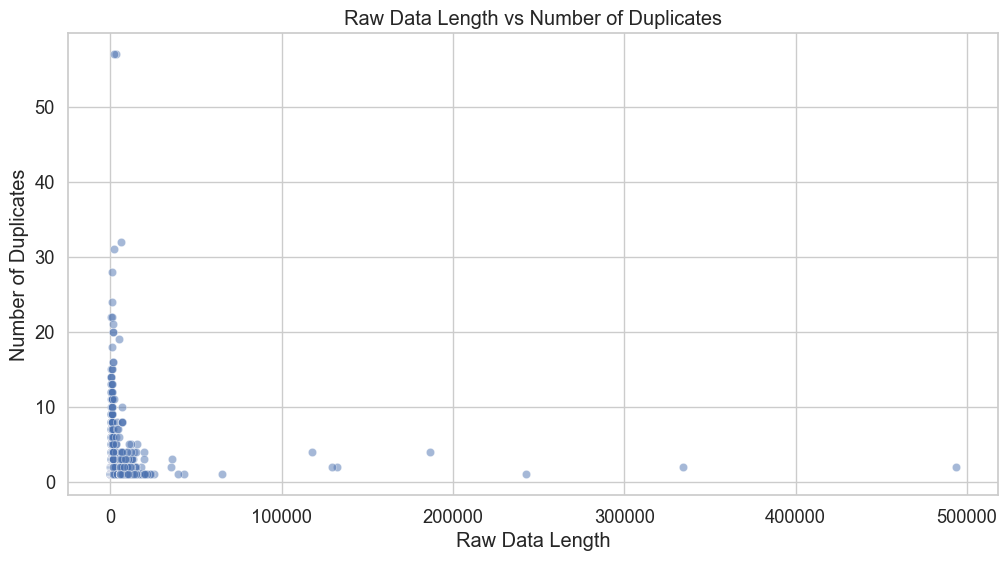

In [14]:
def plot_raw_length_vs_duplicates(df):
    """Plot relationship between raw_length and number of duplicates."""
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='raw_length', y=df['duplicate_ids'].apply(len), data=df, alpha=0.5)
    plt.title("Raw Data Length vs Number of Duplicates")
    plt.xlabel("Raw Data Length")
    plt.ylabel("Number of Duplicates")
    plt.show()

plot_raw_length_vs_duplicates(products_df)


In [15]:

# Correlation analysis
print("Correlation between raw_length and number of duplicates:")
correlation = products_df['raw_length'].corr(products_df['duplicate_ids'].apply(len))
print(f"Correlation coefficient: {correlation:.4f}")


Correlation between raw_length and number of duplicates:
Correlation coefficient: -0.0125



## Summary and Next Steps


In [18]:
print("\nSummary:")
print(f"1. Processed {len(products_df)} unique products.")
print(f"2. Removed products with less than {min_raw_length} words in raw_data.")
print(f"3. Identified {sum(products_df['duplicate_ids'].apply(len) > 1)} products with multiple IDs.")


Summary:
1. Processed 1563 unique products.
2. Removed products with less than 50 words in raw_data.
3. Identified 775 products with multiple IDs.
